## Angewandtes Quantencomputing – Laborpraktikum WiSe 25/26

### Musterlösung für Praktikum 7: Erwartungswerte (21.11.2025)

In diesem Praktikum widmen wir uns den Erwartungswerten von Observablen, einem zentralen Konzept im Quantencomputing. Erwartungswerte beschreiben den mittleren Ausgang einer Messung, die auf einem quantenmechanischen Zustand durchgeführt wird, und ermöglichen es uns, physikalische Größen wie etwa die Energie eines Systems zu bestimmen.

Schritt für Schritt implementieren wir die Berechnung von Erwartungswerten beliebiger Pauli-Observablen. Wir beginnen mit einem einzelnen Qubit und dem Erwartungswert des Z-Operators. In Aufgabe 2 erweitern wir diesen Ansatz auf beliebig viele Qubits. In Aufgabe 3 beziehen wir zusätzlich die Pauli-X- und Pauli-Y-Operatoren ein. In Aufgabe 4 verallgemeinern wir das Verfahren schließlich auf Linearkombinationen von Observablen, wie sie typischerweise in variationalen Quantenalgorithmen auftreten.

In [1]:
from typing import Union
import numpy as np
from qiskit import QuantumCircuit

### Aufgabe 1: Der Erwartungswert für 1 Qubit

In der ersten Übung schreiben und testen wir eine Funktion, die den Erwartungswert für ein einzelnes Qubit mit dem Z-Operator (Pauli-Z-Gatter) berechnet.

**Aufgabe 1.1:** In dieser Aufgabe implementieren wir eine Funktion, die die Anzahl der gemessenen Basiszustände in die entsprechenden gemessenen Wahrscheinlichkeiten umwandelt.  
Die Funktion erzeugt dafür ein Python-Dictionary, das die gleichen Basiszustände enthält wie das Eingangs-Dictionary.

Die Wahrscheinlichkeiten berechnen sich wie folgt:

$
p_i = \frac{\text{Anzahl der Messungen des Bitstrings } i}{\text{Gesamtanzahl der Messungen}}
$

**Hinweis:** Python-Dictionaries lassen sich folgendermaßen nutzen:


In [2]:
results = {"00": 15, "01": 20, "10": 35, "11": 30}

print("Anzahl Messungen für Zustand 00:", results["00"])
print("Gemessene Zustände:", results.keys())
print("Alle Werte der Messungen:", results.values())

# Schleife über alle gemessenen Zustände
for state in results.keys():
    print(f"Zustand {state} wurde {results[state]} mal gemessen.")

# Leeres Dictionary:
results = {}
# Neuen Eintrag hinzufügen:
results["00"] = 15

Anzahl Messungen für Zustand 00: 15
Gemessene Zustände: dict_keys(['00', '01', '10', '11'])
Alle Werte der Messungen: dict_values([15, 20, 35, 30])
Zustand 00 wurde 15 mal gemessen.
Zustand 01 wurde 20 mal gemessen.
Zustand 10 wurde 35 mal gemessen.
Zustand 11 wurde 30 mal gemessen.


In [3]:
def measurements_to_probabilities(measurements: dict) -> dict:
    """
    Converts measurement counts to probabilities, both stored in dictionaries.

    Args:
        measurements (dict): A dictionary with measurement results as keys and their counts as values.

    Returns:
        dict: A dictionary with measurement results as keys and their probabilities as values.
    """
    probabilities = {}

    # Compute the total number of shots
    total_shots = 0
    for m in measurements.keys():
        total_shots += measurements[m]

    # Compute probabilities for each found basis state
    for m in measurements.keys():
        probabilities[m] = measurements[m] / total_shots

    return probabilities

Die Funktion können Sie mit dieser Zelle hier testen:

In [4]:
# Test für die Funktion
measurements = {"00": 15, "01": 20, "10": 35, "11": 30}  # in Summe 100 Messungen
probabilities = measurements_to_probabilities(measurements)
print("Wahrscheinlichkeiten:", probabilities)

Wahrscheinlichkeiten: {'00': 0.15, '01': 0.2, '10': 0.35, '11': 0.3}


**Aufgabe 1.2:** In dieser Aufgabe berechnen wir den Erwartungswert eines einzelnen Z-Operators (Z-Gatters) für einen Quantenzustand eines einzelnen Qubits. Wir schreiben dazu eine Funktion, die die Messungen als Python-Dictionary erhält.  
Nutzen Sie die Funktion aus Aufgabe 1.1, um daraus die Wahrscheinlichkeiten zu bestimmen.  
Der Erwartungswert eines einzelnen Z-Operators lässt sich schreiben als:

$
\langle \Psi | Z | \Psi \rangle = p_0 - p_1
$

Beachten Sie, dass in den Messungen die Bitstrings für den 0- oder 1-Zustand nicht zwingend auftreten, wenn diese nicht gemessen wurden.

**Hinweis:** Mit der `get`-Funktion eines Dictionaries können Sie einen Wert festlegen, der zurückgegeben wird, wenn ein Element nicht im Dictionary enthalten ist.


In [5]:
# Leeres Dictionary:
results = {}
# Neuen Eintrag hinzufügen:
results["00"] = 15
# Zugriff auf einen Eintrag der nicht existiert (0.0 wird zurückgegeben)
results.get("11", 0.0)

0.0

In [6]:
def single_Z_expectation(measurements: dict) -> float:
    """
    Computes the expectation value of a single Z operator from measurement results of a single qubit state.

    Args:
        measurements (dict): A dictionary with measurement results as keys and their counts as values.

    Returns:
        float: The expectation value of the Z operator.
    """

    probabilities = measurements_to_probabilities(measurements)

    p0 = probabilities.get("0", 0.0)
    p1 = probabilities.get("1", 0.0)

    expectation_value = p0 - p1

    return expectation_value

**Aufgabe 1.3:** Testen Sie die Funktion mit den folgenden Messungen: `{"0": 70, "1": 30}`, `{"0": 20}` und `{"1": 15}` und geben Sie die entsprechenden Erwartungswerte aus.

In [7]:
measurements = {"0": 70, "1": 30}
expectation = single_Z_expectation(measurements)
print("Erwartungswert des Z-Operators:", expectation)  # Erwartet wird der Wert 0.4

Erwartungswert des Z-Operators: 0.39999999999999997


In [8]:
measurements = {"0": 20}
expectation = single_Z_expectation(measurements)
print("Erwartungswert des Z-Operators:", expectation)

Erwartungswert des Z-Operators: 1.0


In [9]:
measurements = {"1": 15}
expectation = single_Z_expectation(measurements)
print("Erwartungswert des Z-Operators:", expectation)

Erwartungswert des Z-Operators: -1.0


### Aufgabe 2: Erwartungswert eines mehrqubitigen Z-Operators

In dieser Aufgabe programmieren wir eine Python-Funktion, mit denen wir den Erwartungswert eines Operators berechnen können, der aus mehreren Z-Gattern besteht, zum Beispiel $ Z_1 Z_2 Z_4 $.

Um solche Operatoren kompakt darzustellen, verwenden wir **Pauli-Strings**.  
Ein Pauli-String ist ein String, dessen Länge der Anzahl der Qubits entspricht:

- `"Z"` bedeutet: Auf diesem Qubit wirkt ein Z-Operator.  
- `"I"` bedeutet: Auf diesem Qubit passiert nichts (Identitätsoperator).

Beispiel für 5 Qubits:

$
Z_1 Z_2 Z_4 \;\;\longrightarrow\;\; \texttt{"ZZIZI"}
$

UNsere Python-Funktion erhält diesen Pauli-String zusammen mit den Messdaten.

Für jedes gemessene Bitstring-Ergebnis $i$ (z. B. `"10101"`) kennen wir eine Wahrscheinlichkeit $p_i$.  
Um den Erwartungswert zu berechnen, müssen wir bestimmen, welchen Beitrag jeder einzelne gemessene Bitstring dazu liefert.

Der entscheidende Punkt ist: **An jeder Position, an der der Pauli-String `"Z"` hat und der gemessene Bitstring eine `"1"` enthält, entsteht ein Faktor $-1$.**

Anders formuliert:  
Ein Z-Gatter kehrt das Vorzeichen genau dann um, wenn das entsprechende Qubit im Messstring im Zustand $|1\rangle$ war.

Beispiel:

$
\langle 101 \lvert Z_1 Z_2 I_3 \rvert 101 \rangle
= \langle 1 | Z_1 | 1 \rangle \cdot \langle 0 | Z_2 | 0 \rangle \cdot \langle 1 | I_3 | 1 \rangle
= (-1)\cdot(1)\cdot(1) = -1
$

Hier steht am ersten Qubit ein Z und das Bit ist `1`, daher ein $-1$.  
Der Faktor $(-1)$ kann auch mehrfach auftreten, z. B.:

$
\langle 11 | Z_1 Z_2 | 11 \rangle = (-1)(-1) = 1
$

Für jedes Bitstring $i$ bestimmen wir also:

1. **den Faktor** $\alpha_i = \pm 1$, abhängig von den Übereinstimmungen `"Z"` ↔ `"1"`,  
2. **den Beitrag zum Erwartungswert:** $p_i \cdot \alpha_i$.

Dann summieren wir über alle Bitstrings:

$
\langle \Psi \lvert O \rvert \Psi \rangle = \sum_i \alpha_i\, p_i.
$

Der Algorithmus lässt sich im folgenden Pseudocode zusammenfassen:

```
expectation_value = 0
FOR each bitstring i IN measurement_data:
    factor = 1

    FOR each position k IN pauli_string:

        IF pauli_string[k] == "Z" AND i[k] == "1" THEN
            factor = factor * (-1)

    expectation_value = expectation_value + probabilities[i] * factor

RETURN expectation_value
```


**Aufgabe 2.1:** Berechnen Sie den Erwartungswert des Z-Observablen für mehrere Qubits aus einem gegebenen Pauli-String, der aus `"I"` und `"Z"` besteht, sowie einem Python-Dictionary mit den gemessenen Bitstrings und deren Anzahl. Bestimmen sie dafür zunächst die Wahrscheinlichkeiten bevor sie diese mit dem passenden Vorzeichen für den Erwartungswert summieren. 

In [10]:
# Tip: Python erlaubt es, sowohl über die Indizes als auch die Werte eines Strings zu iterieren:

string = "abcd"

for i, char in enumerate(string):
    print(f"Index: {i}, Character: {char}")

Index: 0, Character: a
Index: 1, Character: b
Index: 2, Character: c
Index: 3, Character: d


In [11]:
def Z_expectation_from_measurements(pauli_string: str, measurements: dict) -> float:
    """
    Implementation of the expectation value calculation for multi-qubit Z Pauli-strings.

    Args:
        pauli_string (str): A string consisting of "I" and "Z" characters representing the Pauli operator.
        measurements (dict): A dictionary with measurement results as keys and their counts as values.

    Returns:
        float: The expectation value of the given Pauli Z string operator.
    """

    probabilities = measurements_to_probabilities(measurements)

    expectation_value = 0

    for m in measurements.keys():
        fac = 1.0
        for i, s in enumerate(pauli_string):
            if s == "Z" and m[i] == "1":
                fac = fac * (-1.0)

        expectation_value += probabilities[m] * fac

    return expectation_value

Nutzen Sie den folgenden Code um ihre Funktion zu testen:

In [12]:
pauli_string = "ZIZ"
measurements = {
    "000": 8,
    "001": 6,
    "010": 2,
    "011": 4,
    "100": 5,
    "101": 2,
    "110": 4,
    "111": 1,
}
Z_expectation_from_measurements(
    pauli_string, measurements
)  # Ergebniss sollte -0.1875 sein

-0.1875

**Aufgabe 2.2:** In einem nächsten Schritt fügen wir zu der Funktion noch die Möglichkeit hinzu, die Messungen mit dem Quantencomputer selbst durchzuführen (simuliert oder mit einem echten Backend).

In der Funktion sind die passenden Möglichkeiten, die Messungen und Wahrscheinlichkeiten zu berechnen, bereits vorimplementiert.  
Fügen Sie die Berechnung des Erwartungswertes aus Aufgabe 2.1 hinzu.

In [13]:
from qc_lecture_tools.statevector import sv_dict
from qc_lecture_tools.sampling import (
    sample_from_circuit_backend,
    sample_from_circuit,
    measurements_to_probabilities,
)

In [14]:
def Z_expectation(
    pauli_string: str,
    quantum_circuit: QuantumCircuit,
    shots: Union[None, int] = None,
    backend=None,
) -> float:
    """
    Computes the expectation value of a multi-qubit Z Pauli-string operator from a quantum circuit.

    Args:
        pauli_string (str): A string consisting of "I" and "Z" characters representing the Pauli operator.
        quantum_circuit (QuantumCircuit): The quantum circuit to be evaluated.
        shots (int or None): The number of shots for measurement. If None, statevector simulation is used.
        backend: The backend to use for execution if shots is specified.

    Returns:
        float: The expectation value of the given Pauli Z string operator.
    """

    if shots is None:
        # No shots specified, use statevector simulation to compute exact probabilities
        probabilities = sv_dict(quantum_circuit)
    else:
        # Shots specified, perform measurements
        measured_quantum_circuit = quantum_circuit.copy()
        measured_quantum_circuit.measure_all()

        if backend is None:
            # No backend specified, use local sampling from the exact simulator
            measurements = sample_from_circuit(measured_quantum_circuit, shots)
        else:
            # Backend specified, use the provided backend for sampling (fake or real hardware)
            measurements = sample_from_circuit_backend(
                measured_quantum_circuit, shots, backend
            )

        # Convert measurement counts to probabilities
        probabilities = measurements_to_probabilities(measurements)

    # Calculate the expectation value
    expectation_value = 0
    for m in probabilities.keys():
        fac = 1.0
        for i, s in enumerate(pauli_string):
            if s == "Z" and m[i] == "1":
                fac = fac * (-1.0)

        expectation_value += probabilities[m] * fac

    return expectation_value

Nutzen Sie den folgenden Code um ihre Implementierung zu testen:

In [15]:
quantum_circuit = QuantumCircuit(3)
quantum_circuit.rx(0.8, 0)
quantum_circuit.ry(0.4, 1)
quantum_circuit.cx(1, 2)

Z_expectation("ZIZ", quantum_circuit)  # Wert sollte ca. 0.6417093742397796 sein

0.6417093742397796

In [16]:
Z_expectation("ZIZ", quantum_circuit, shots=10000)  # Wert sollte ca. 0.65 sein

0.6396

In [17]:
from qiskit_ibm_runtime.fake_provider import FakeManilaV2

Z_expectation(
    "ZIZ", quantum_circuit, shots=10000, backend=FakeManilaV2()
)  # Wert sollte ca. 0.59 - 0.63 sein

0.6122

In [18]:
# Falls die Implementierung von Aufgabe 2.2 nicht funktioniert:
# from qc_lecture_tools.expectation_value import Z_expectation

### Aufgabe 3: Erwartungswert eines allgemeinen Pauli-Strings

In dieser Aufgabe erweitern wir unsere Funktion so, dass sie den Erwartungswert **beliebiger Pauli-Strings** berechnen kann.  
Im Unterschied zu Aufgabe 2, wo nur `"Z"`- und `"I"`-Operatoren vorkamen, können nun auch `"X"`- und `"Y"`-Gatter auftreten.

Beispiel:

$
X_1\, Y_3\, Z_5 \quad\longrightarrow\quad \texttt{"XIYIZ"}
$

Wie zuvor ist jeder Buchstabe einem Qubit zugeordnet.

Um den Erwartungswert eines Z-Operators zu bestimmen, konnten wir die Messungen direkt als Bitstrings in der Z-Basis auswerten wie in Aufgabe 2 implementiert.

Für `"X"`- und `"Y"`-Operatoren ist das jedoch nicht möglich:  
Die Messungen liegen **immer in der Z-Basis** vor! Das bedeutet: Wir müssen den Messprozess so anpassen, dass die Messungen effektiv in der X- bzw. Y-Basis erfolgen.  
Damit wir einen Erwartungswert für `"X"` oder `"Y"` bestimmen können, müssen wir das entsprechende Qubit **vor der Messung drehen**, sodass der Messvorgang in der Z-Basis dieselbe Information liefert wie eine echte X- bzw. Y-Messung.

Um einen X-Operator zu messen, führen wir vor der Messung ein Hadamard-Gatter aus:

$
X = HZH \quad\longrightarrow\quad \langle\Psi |X|\Psi\rangle = \langle\Psi |HZH|\Psi\rangle = \langle\Psi H|Z|H\Psi\rangle
$

Das bedeutet: **Wenn im Pauli-String ein `"X"` steht, fügen wir vor der Messung ein Hadamard-Gatter auf dieses Qubit hinzu.**  
Dadurch entspricht die anschließende Messung in der Z-Basis einer X-Messung.

Für eine Y-Messung nutzen wir die Tatsache:

$
Y = SHZHS^\dagger \quad\longrightarrow\quad \langle\Psi |Y|\Psi\rangle = \langle\Psi |SHZHS^\dagger|\Psi\rangle = \langle\Psi S H|Z|HS^\dagger\Psi\rangle
$

Praktisch heißt das: **Wenn im Pauli-String ein `"Y"` steht, fügen wir vor der Messung die Gate-Sequenz $S^\dagger$ gefolgt von einem Hadamard-Gatter ein.**  
Diese Transformation dreht das Qubit so, dass eine Messung in der Z-Basis die Y-Information liefert.

| im Pauli-String | benötigte Quantengatter für die Transformation | Operator nach der Transformation |
|-----------------|-----------------------------------------------|----------------------------------|
| `"I"`           | keine                                         | `"I"`                            |
| `"Z"`           | keine                                         | `"Z"`                            |
| `"X"`           | $H$                                         | `"Z"`                            |
| `"Y"`           | $S^\dagger$ gefolgt von $H$               | `"Z"`                            |

Unten ist eine Schablone für eine Funktion zur Berechnung des allgemeinen Erwartungswerts gegeben.  
Drei Dinge fehlen noch und müssen von Ihnen implementiert werden:

1. Generierung eines Pauli-Strings aus `"I"` und `"Z"`, den wir der Funktion `Z_expectation` übergeben können.  
2. Anpassung des Schaltkreises entsprechend dem gegebenen Pauli-String.  
3. Finaler Aufruf der Funktion `Z_expectation`.

Implementieren Sie dazu eine Schleife über den gegebenen Pauli-String, in der der Schaltkreis angepasst wird (Gatter hinzufügen) und der neue Pauli-String für `Z_expectation` erstellt wird.

**Hinweis:** Das $S^\dagger$ Quantengatter können Sie in Qiskit mit der Funktion `quantum_circuit.sdg(i)` anhängen.


In [19]:
def single_expectation_value(
    pauli_string: str,
    quantum_circuit: QuantumCircuit,
    shots: Union[None, int] = None,
    backend=None,
) -> float:
    """
    Computes the expectation value of a single Pauli string operator build from (X, Y, Z, I) from a quantum circuit.

    Args:
        pauli_string (str): A string consisting of "X", "Y", "Z", and "I" characters representing the Pauli operator.
        quantum_circuit (QuantumCircuit): The quantum circuit to be evaluated.
        shots (int or None): The number of shots for measurement. If None, statevector simulation is used.
        backend: The backend to use for execution if shots is specified.

    Returns:
        float: The expectation value of the given Pauli string operator.
    """

    modified_quantum_circuit = quantum_circuit.copy()

    Z_string = ""
    for i, s in enumerate(pauli_string):
        if s == "X":
            modified_quantum_circuit.h(i)
            Z_string += "Z"
        elif s == "Y":
            modified_quantum_circuit.sdg(i)
            modified_quantum_circuit.h(i)
            Z_string += "Z"
        elif s == "Z":
            Z_string += "Z"
        elif s == "I":
            Z_string += "I"
        else:
            raise ValueError("Unknown PauliGate:", s)

    return Z_expectation(Z_string, modified_quantum_circuit, shots, backend)

In [20]:
quantum_circuit = QuantumCircuit(3)
quantum_circuit.ry(0.8, 0)
quantum_circuit.ry(0.8, 1)
quantum_circuit.rz(0.3, 1)
quantum_circuit.x(1)

single_expectation_value(
    "XYZ", quantum_circuit
)  # Wert sollte -0.15207462776311445 sein

-0.15207462776311445

In [21]:
single_expectation_value(
    "XYZ", quantum_circuit, shots=10000
)  # Wert sollte ca -0.15 sein

-0.15959999999999994

In [22]:
single_expectation_value(
    "XYZ", quantum_circuit, shots=10000, backend=FakeManilaV2()
)  # Wert sollte ca. zwischen -0.12 und -0.15  sein

-0.1212

### Aufgabe 4: Allgemeine Observablen

Beim Quantencomputing tauchen öfters Linearkombinationen von einzelnen Operatoren (Pauli-Strings) auf, zum Beispiel: $O = 0.25 X_1 Y_2Z_3 + 0.3 X_2Z_3$.

Auch hier können wir die Terme wieder auseinanderziehen:

$
\braket{\Psi| 0.25 X_1 Y_2Z_3 + 0.3 X_2Z_3|\Psi} = 0.25 \braket{\Psi|X_1 Y_2Z_3|\Psi} + 0.3 \braket{\Psi|X_2Z_3|\Psi}
$

Die einzelnen Terme rechts haben wir bereits in Aufgabe 3 implementiert. Fehlt also nur noch das aufteilen und summieren. 

Wir nutzen für die allgemeinen Operatoren wir oben die Datenstruktur `SparsePauliOp` in Qiskit, welche diese Kombinationen darstellen kann. 

Hier können wir die einzelne Pauli-Strings initialisieren und als Summe zusammenfügen schreiben:

```python
observable = 0.5*SparsePauliOp("II") + 0.25*SparsePauliOp("XY")
```

In [23]:
from qiskit.quantum_info import SparsePauliOp

# Beispiele für die SparsePauliOp Klasse

# Initialisierung einer Observables bestehend aus zwei Pauli-Strings
observable = 0.25 * SparsePauliOp("XYZ") + 0.3 * SparsePauliOp("IXZ")
print(observable)

# Zugriff auf die einzelnen Pauli-Strings und deren Koeffizienten
for op in observable:
    print(str(op.paulis[0]), op.coeffs[0])

SparsePauliOp(['XYZ', 'IXZ'],
              coeffs=[0.25+0.j, 0.3 +0.j])
XYZ (0.25+0j)
IXZ (0.3+0j)


Implementieren sie nun die Funktion, die über die einzelnen Terme summiert, dabei die ``single_expectation_value`` Funktion aufruft und den gesamten Erwartungswert zurückgibt. 

In [24]:
def expectation_value(
    observable: SparsePauliOp,
    quantum_circuit: QuantumCircuit,
    shots: Union[None, int] = None,
    backend=None,
) -> float:
    """
    Computes the expectation value of a given SparsePauliOp observable from a quantum circuit.

    Args:
        observable (SparsePauliOp): The observable to be evaluated.
        quantum_circuit (QuantumCircuit): The quantum circuit to be evaluated.
        shots (int or None): The number of shots for measurement. If None, statevector simulation is used.
        backend: The backend to use for execution if shots is specified.

    Returns:
        float: The expectation value of the given observable.
    """

    expectation_value = 0.0

    for o in observable:
        expectation_value += (
            single_expectation_value(str(o.paulis[0]), quantum_circuit, shots, backend)
            * o.coeffs[0]
        )

    return float(np.real_if_close(expectation_value))

Sie können ihre Implementierung wieder mit dem folgenden Code testen:

In [25]:
observable = 0.5 * SparsePauliOp("YX") + 0.25 * SparsePauliOp("XY")
quantum_circuit = QuantumCircuit(2)
quantum_circuit.ry(0.8, 0)
quantum_circuit.rz(0.8, 0)
quantum_circuit.ry(0.9, 1)
quantum_circuit.rz(0.9, 1)

expectation_value(observable, quantum_circuit)  # Sollte ca 0.20195286 sein

0.20195286577753827

In [26]:
expectation_value(observable, quantum_circuit, shots=10000)  # Sollte ca 0.20195286 sein

0.20149999999999998

In [27]:
expectation_value(observable, quantum_circuit, shots=10000, backend=FakeManilaV2())

0.20684999999999998

### Aufgabe 5: Standardabweichung

Nun, da wir ganz allgemein den Erwartungswert von beliebigen Pauli-Observablen berechnen können, können wir als Nächstes die Standardabweichung berechnen.  
Die Standardabweichung beschreibt die Streuung des Erwartungswertes bei einer endlichen Anzahl von Messungen.

Die Standardabweichung für eine beliebige Observable $O$ können wir folgendermaßen berechnen:

$
\mathrm{std}(O) = \sqrt{ \left( \braket{\Psi|OO|\Psi} - \braket{\Psi|O|\Psi}^2 \right   ) / N_\text{shots} }
$

Das Quadrat $OO = O^2$ einer Observable entspricht der Hintereinanderausführung der Operatoren, also  
$(Z_1 X_2)^2 = (Z_1 X_2)(Z_1 X_2) = (Z_1 Z_1)(X_2 X_2) = I \otimes I$.

Für mehrere Terme muss man wieder ausmultiplizieren, dabei heben sich in der Regel viele Terme wieder auf. Dies können wir automatisiert in Qiskit durchführen lassen.


In [28]:
observable = 0.5 * SparsePauliOp("YX") + 0.25 * SparsePauliOp("ZZ")

# Diser Aufruf quadriert die Observable und vereinfacht das Ergebnis
observable_squared = observable.power(2).simplify()

print(observable_squared)

SparsePauliOp(['II', 'XY'],
              coeffs=[0.3125+0.j, 0.25  +0.j])


Implementieren Sie nun die Funktion, die die Standardabweichung gemäß der obigen Formel berechnet.  
Subtrahieren Sie dazu den quadrierten Erwartungswert $\braket{\Psi|O|\Psi}^2$ vom Erwartungswert der quadrierten Observable $\braket{\Psi|OO|\Psi}$.  
Berechnen Sie diese beiden Werte zunächst **exact** ohne Shots (`shots=None`) und verwenden Sie anschließend die übergebenen Shots zur Anwendung der Formel für die Standardabweichung.

**Hinweis:** Für die Wurzelfunktion und das Quadrieren können Sie die Funktionen `np.sqrt()` und `np.square()` verwenden.

In [29]:
def standard_deviation(
    observable: SparsePauliOp, quantum_circuit: QuantumCircuit, shots: int
):
    """
    Computes the standard deviation of a given SparsePauliOp observable from a quantum circuit.

    Args:
        observable (SparsePauliOp): The observable to be evaluated.
        quantum_circuit (QuantumCircuit): The quantum circuit to be evaluated.
        shots (int): The number of shots for computing the standard deviation.

    Returns:
        float: The standard deviation of the given observable.
    """

    observable_squared = observable.power(2).simplify()
    exp_values_squared = expectation_value(
        observable_squared, quantum_circuit, shots=None
    )
    exp_values = expectation_value(observable, quantum_circuit, shots=None)

    std = np.sqrt((exp_values_squared - np.square(exp_values)) / shots)

    return std

Benutzen Sie folgenden Code, um ihre Implementierung zu testen

In [30]:
observable = 0.5 * SparsePauliOp("YX") + 0.25 * SparsePauliOp("XY")
quantum_circuit = QuantumCircuit(2)
quantum_circuit.ry(0.8, 0)
quantum_circuit.rz(0.8, 0)
quantum_circuit.ry(0.9, 1)
quantum_circuit.rz(0.9, 1)

standard_deviation(observable, quantum_circuit, 1000)  # Sollte ca 0.01949320 sein

np.float64(0.01949320391513546)

### Aufgabe 6: Analyse

Zum Abschluss analysieren wir das Finite-Sampling-Rauschen des Erwartungswerts.  
Dafür bestimmen wir den Erwartungswert aus einer endlichen Anzahl von Messungen.  
Da die Messungen zufällig sind, enthält dieses Ergebnis immer eine gewisse Zufallskomponente, deren Einfluss wir hier genauer untersuchen. Für die Experimente verwenden wir eine feste Anzahl von 1000 Messungen (`shots=1000`).

Zunächst berechnen wir den theoretischen Erwartungswert (`shots=None`) sowie dessen Standardabweichung und geben diese aus.  
Anschließend berechnen wir den Erwartungswert mit 1000 Messungen.  
Die Erwartungswertberechnung wiederholen wir 500 Mal, um anschließend eine Verteilung der erhaltenen Erwartungswerte analysieren zu können.  
Das Plotten und die Auswertung sind bereits implementiert, Sie müssen daher nur die theoretischen Werte sowie die Erwartungswertberechnung mit einer endlichen Anzahl an Messungen ergänzen.

Speichern Sie dafür die einzelnen Erwartungswerte in der Liste `erwartungswerte` ab (`erwartungswerte.append(wert)`).


In [31]:
import matplotlib.pyplot as plt
from scipy.stats import norm


def analyse(erwartungswerte: list):
    """
    Histogramm und Gaußverteilung Fit der Erwartungswerte.

    Args:
        erwartungswerte (list): Liste der berechneten Erwartungswerte

    Returns:
        Grafik mit der Analyse
    """

    # Konvertierung in das richtige Format für die Analyse
    erwartungswerte = np.array(erwartungswerte).reshape(-1, 1)

    # Fit einer Gaußverteilung an die Daten
    mu, sigma = norm.fit(erwartungswerte)

    # Erzeuge Histogramm
    plt.figure(figsize=(7, 4))
    count, bins, ignored = plt.hist(
        erwartungswerte, bins=40, density=True, alpha=0.6, edgecolor="black"
    )

    # Erzeuge die x-Werte für die gefittete Kurve
    x = np.linspace(min(erwartungswerte), max(erwartungswerte), 1000)
    pdf = norm.pdf(x, mu, sigma)

    # Plot der gefitteten Gaußkurve
    plt.plot(x, pdf, "r-", linewidth=2, label=f"Fit: μ={mu:.3f}, σ={sigma:.3f}")

    plt.title("Histogramm des Erwartungswerts mit gefitteter Gaußkurve")
    plt.xlabel(r"Erwartungswert")
    plt.ylabel("Häufigkeit des gem. Erwartungswerts")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    return plt

In [32]:
# Schaltkreis für die Analyse (kann auch gerne abgeändert werden)

quantum_circuit = QuantumCircuit(3)
quantum_circuit.ry(0.8, 0)
quantum_circuit.rz(0.8, 0)
quantum_circuit.ry(0.9, 1)
quantum_circuit.rz(0.9, 1)
quantum_circuit.ry(2.0, 1)
quantum_circuit.rz(3.0, 1)

quantum_circuit.cx(0, 1)
quantum_circuit.cx(1, 2)
quantum_circuit.cx(2, 0)

observable = 0.5 * SparsePauliOp("YXZ") + 0.25 * SparsePauliOp("ZXY")

**Aufgabe 6.1:** Analysieren Sie den Erwartungswert für den gegebenen Schaltkreis und die gegebene Observable. Wir verwenden hierfür die ideale Simulation, jedoch mit einer limitierten Anzahl von 1000 Messungen.

 Theoretische Erwartungswert: 0.12864994028766108
 Theoretische Standardabweichung: 0.01720317391832046


<module 'matplotlib.pyplot' from '/Users/davidkreplinhhn/Lehrveranstaltungen/Laborpraktikum QC WS 25/aqp_ws2526_work/.venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

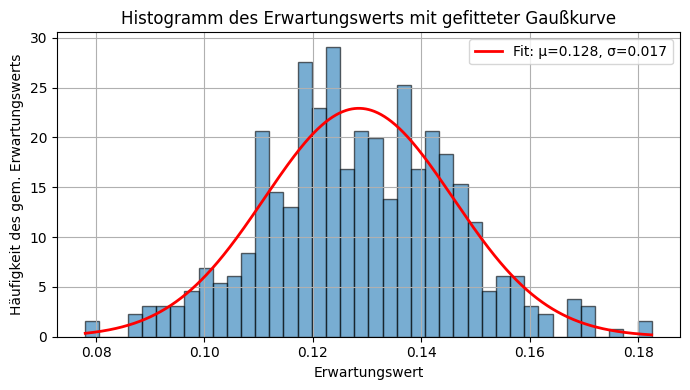

In [33]:
print(
    " Theoretische Erwartungswert:",
    expectation_value(observable, quantum_circuit, shots=None),
)
print(
    " Theoretische Standardabweichung:",
    standard_deviation(observable, quantum_circuit, 1000),
)

erwartungswerte = []
for _ in range(500):
    erwartungswerte.append(expectation_value(observable, quantum_circuit, shots=1000))

analyse(erwartungswerte)

**Aufgabe 6.2:** Nun wiederholen wir das Experiment mit einem simulierten Hardware-Backend (`FakeManilaV2()`), um die wiederholten Messungen durchzuführen.  
Dies wird wahrscheinlich ein paar Minuten rechnen. (Theoretisch können Sie auch ein echtes Backend verwenden, es wird nur einiges an Rechenzeit kosten.)

Vergleichen Sie den gefundenen Mittelwert (im Plot mit µ gekennzeichnet) mit dem theoretischen Wert und dem Ergebnis aus Aufgabe 6.1. Was fällt auf?

Theoretischer Erwartungswert: 0.12864994028766108
Theoretische Standardabweichung: 0.01720317391832046


<module 'matplotlib.pyplot' from '/Users/davidkreplinhhn/Lehrveranstaltungen/Laborpraktikum QC WS 25/aqp_ws2526_work/.venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

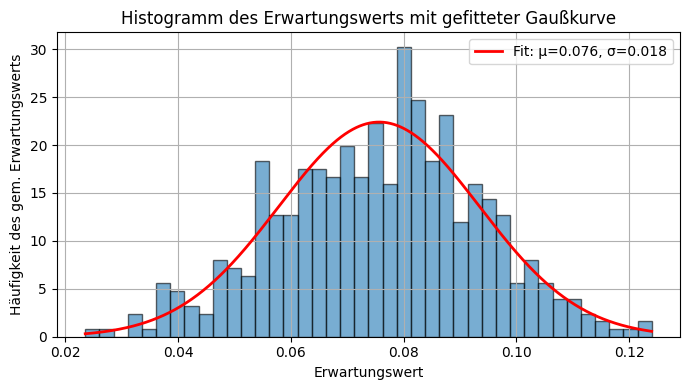

In [34]:
print(
    "Theoretischer Erwartungswert:",
    expectation_value(observable, quantum_circuit, shots=None),
)
print(
    "Theoretische Standardabweichung:",
    standard_deviation(observable, quantum_circuit, 1000),
)

backend = FakeManilaV2()

erwartungswerte = []
for _ in range(500):
    erwartungswerte.append(
        expectation_value(observable, quantum_circuit, shots=1000, backend=backend)
    )

analyse(erwartungswerte)